<a href="https://colab.research.google.com/github/Tazoria/TIL/blob/main/data_analysis/basic/04_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💕 Seaborn
- Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
- 타 패키지에 의존
  - 기본적인 시각화 기능 : Matplotlib 패키지
  - 통계 기능 : Statsmodels 패키지

## 💡 Seaborn의 시각화 방법

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 한글 표시
!apt-get install -y fonts-nanum # 코렙에서는 한글폰트들이 한정적
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
plt.rc('font', family='NanumBarunGothic')

# 마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 1️⃣ Regplot

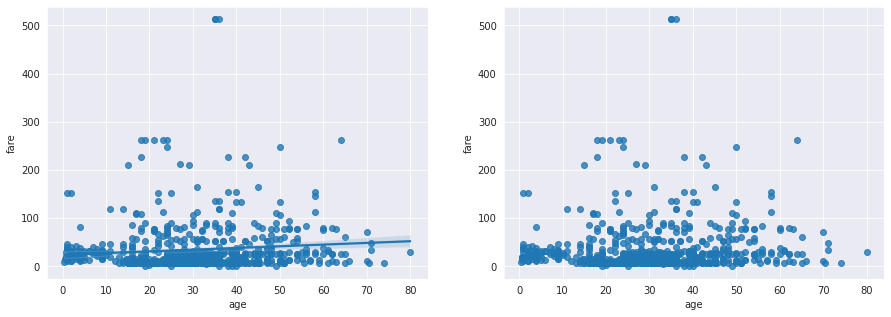

In [ ]:
# regplot

# seaborn의 스타일 기본 5가지 테마: darkgrid, whitegrid, dark, white, ticks
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 그래프 그리기 - 선형회귀선 표시
# 회귀선(분석) - regression
sns.regplot(x='age', y='fare', data=titanic, ax=ax1)

# 비교를 위한 회귀선을 미표시 그래프(fit_reg:회귀선, default=True)
sns.regplot(x='age', y='fare', data=titanic, ax=ax2, fit_reg=False)

plt.show()

# 회귀선 근처에 옅은 색깔을 입혀서 회귀선의 범위를 보여줌!

### 2️⃣ Heatmap

In [ ]:
# heatmap

# flights: 1949 ~ 1960년까지 월별 여객기 이용승객수
flights = sns.load_dataset('flights')
flights_passenger = flights.pivot('month', 'year', 'passengers')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


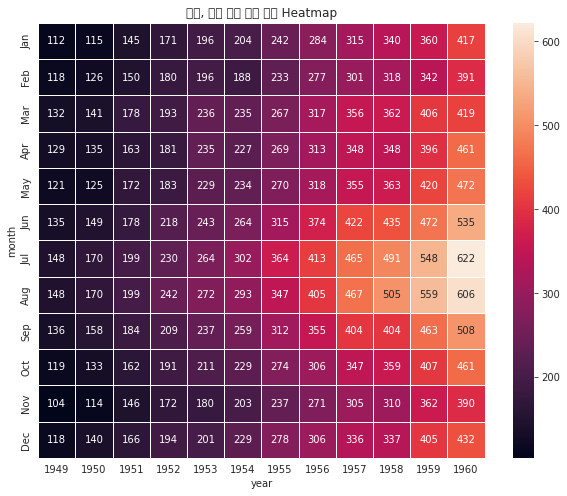

In [ ]:
plt.figure(figsize=(10,8))
plt.title('연도, 월별 승객 수에 대한 Heatmap')
# fmt: 숫자들의 포맷팅방식
sns.heatmap(flights_passenger, annot=True, fmt='d', linewidths=1)
plt.show()

### 3️⃣ Scatterplot
- stripplot: 데이터의 분산을 고려하지 않음
- swarmplot: 데이터의 분산을 고려 ( 중복 X )

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


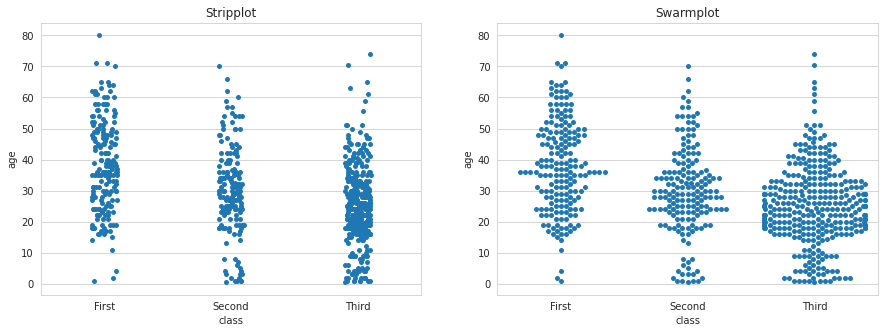

In [ ]:
# scatter plot

sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 이산형 분포 - stripplot
sns.stripplot(x='class', y='age', data=titanic, ax=ax1)
# 이산형 분포 - swarmplot
sns.swarmplot(x='class', y='age', data=titanic, ax=ax2)
# 차트의 제목
ax1.set_title('Stripplot')
ax2.set_title('Swarmplot')
plt.show()

### 4️⃣ Barplot

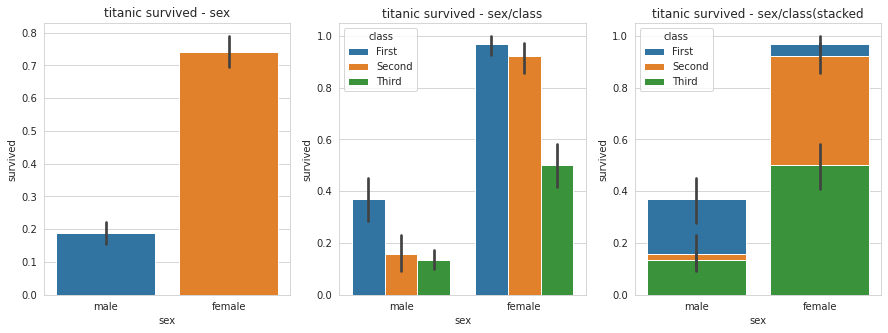

In [ ]:
# bar plot

# 객체 생성
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# x축과 y축에 변수를 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
ax1.set_title('titanic survived - sex')
# x축과 y축에 변수를 할당 - hue 옵션: class
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)
ax2.set_title('titanic survived - sex/class')
# x축과 y축에 변수를 할당 - hue 옵션 class 누적으로 표시
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)
ax3.set_title('titanic survived - sex/class(stacked')
plt.show()

### 5️⃣ Countplot

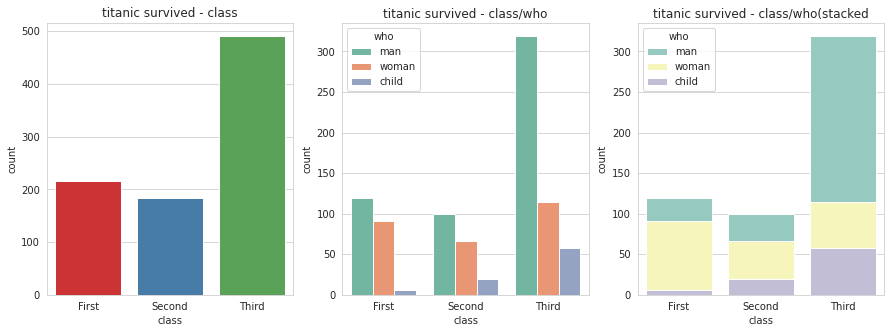

In [ ]:
# countplot()

# 객체 생성
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
# palette: 색상모음
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)
ax1.set_title('titanic survived - class')
# hue 옵션으로 who를 추가(여자, 남자, 아이)
sns.countplot(x='class', palette='Set2', hue='who', data=titanic, ax=ax2)
ax2.set_title('titanic survived - class/who')
# hue 옵션으로 who를 추가(여자, 남자, 아이), 누적
sns.countplot(x='class', palette='Set3', hue='who', dodge=False, data=titanic, ax=ax3)
ax3.set_title('titanic survived - class/who(stacked')
plt.show()

### 6️⃣ Boxplot & Violinplot
- violinplot : 데이터의 분포와 범위를 파악하기 쉬움

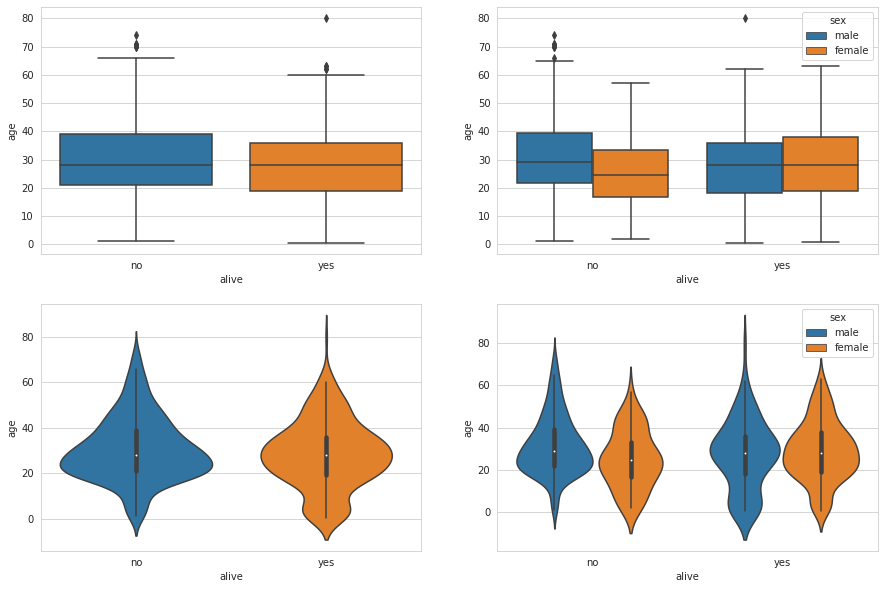

In [ ]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# ax1: boxplot - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)
# ax2: boxplot - hue='sex'
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)
# ax3: violinplot - 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
# ax4: violinplot - hue='sex'
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()

### 7️⃣ Jointplot
- 산점도 + 히스토그램


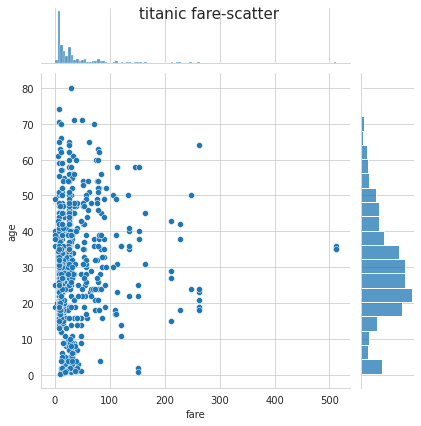

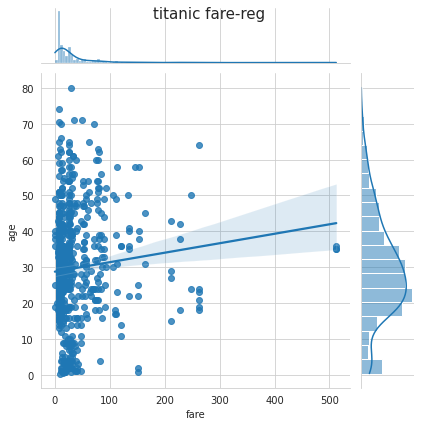

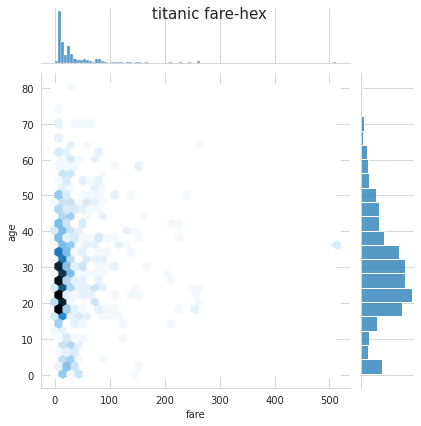

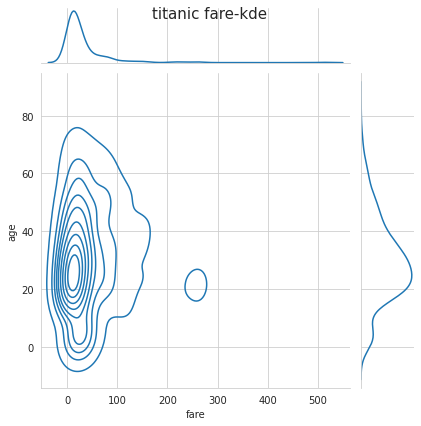

In [ ]:
# jointplot

sns.set_style('whitegrid')

# jointplot - 기본값
j1 = sns.jointplot(x='fare', y='age', data=titanic)
# jointplot - 회귀선
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic)
# jointplot - 육각그래프
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic)
# jointplot - 커널 밀집그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic)

# 차트 제목
j1.fig.suptitle('titanic fare-scatter', size=15)
j2.fig.suptitle('titanic fare-reg', size=15)
j3.fig.suptitle('titanic fare-hex', size=15)
j4.fig.suptitle('titanic fare-kde', size=15)

plt.show()

### 8️⃣ Pairplot
- 데이터에 들어 있는 각 컬럼(열)들의 모든 상관 관계를 출력
- 3차원 이상의 데이터라면 pairplot 함수를 사용해 분포도를 그림
- 각 집합의 조합에 대해 히스토그램과 분포도를 그림(grid 형태)



/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


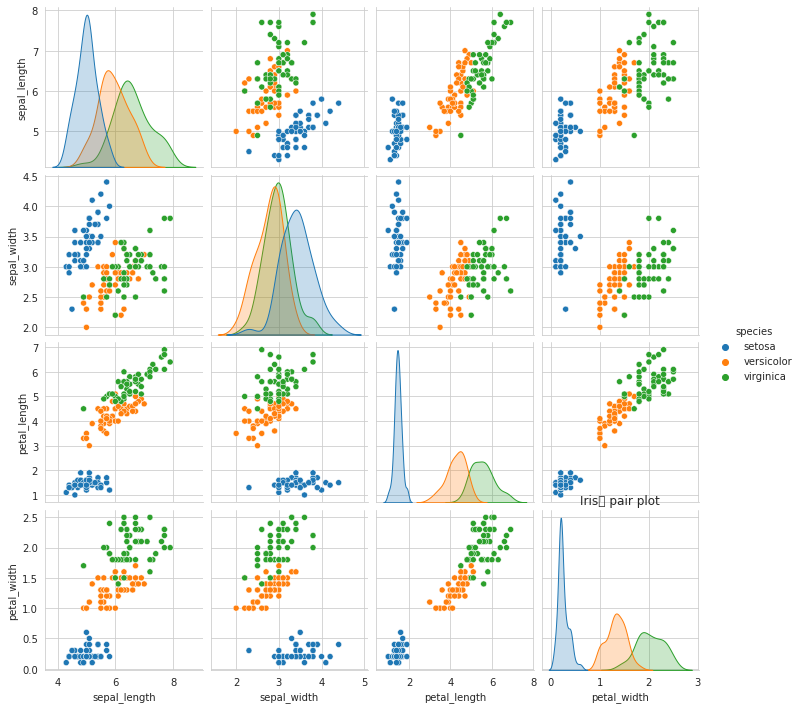

In [ ]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species')
plt.title('Iris의 pair plot')
plt.show()